In [1]:
import pandas as pd 
import numpy as np
import string 
import itertools
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics 
df = pd.read_csv('drugsComtrain.csv' , sep ='\t')

In [2]:
df

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79


In [3]:
df.condition.unique().shape

(885,)

In [4]:
df.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [5]:
df.condition.value_counts().head(12)

condition
Birth Control              28788
Depression                  9069
Pain                        6145
Anxiety                     5904
Acne                        5588
Bipolar Disorde             4224
Insomnia                    3673
Weight Loss                 3609
Obesity                     3568
ADHD                        3383
Diabetes, Type 2            2554
Emergency Contraception     2463
Name: count, dtype: int64

In [6]:
# iter tools can be used for many purposes like -> Hyper parameter tuning , plotting something , confusion matrix and all 


In [7]:
# pd.set_option('display.max_rows' , None) - To print all the values in the dataset

In [8]:
df_train = df[(df['condition']=='Birth Control') | (df['condition']=='Depression') | (df['condition']=='Pain') | (df['condition']=='Anxiety')| (df['condition']=='Acne') | (df['condition']=='Bipolar Disorde') | (df['condition']=='Insomnia')]

In [9]:
df_train.shape

(63391, 7)

In [10]:
X = df_train[['condition', 'review']]

In [11]:
X

,condition,review
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
7,Bipolar Disorde,"""Abilify changed my life. There is hope. I was..."
9,Birth Control,"""I had been on the pill for many years. When m..."
11,Depression,"""I have taken anti-depressants for years, with..."
...,...,...
161277,Insomnia,"""I started taking this medication 10 years ago..."
161283,Bipolar Disorde,"""I was in a very bad place at the time I start..."
161286,Depression,"""This is the third med I&#039;ve tried for anx..."
161287,Anxiety,"""I was super against taking medication. I&#039..."


In [12]:
# Performing Exploratory Data Analysis 

In [13]:
X.condition.value_counts()

condition
Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Name: count, dtype: int64

In [14]:
X.head()

,condition,review
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
7,Bipolar Disorde,"""Abilify changed my life. There is hope. I was..."
9,Birth Control,"""I had been on the pill for many years. When m..."
11,Depression,"""I have taken anti-depressants for years, with..."


In [15]:
X_birth = X[(X['condition']=='Birth Control')]
X_dep = X[(X['condition']=='Depression ')]
X_bp = X[(X['condition']=='High Blood Pressure')]
X_diab = X[(X['condition']=='Diabetes, Type 2')]
X_adhd = X[(X['condition']=='ADHD')]
X_em_contraception = X[(X['condition']=='Emergency Contraception')]
X_acne = X[(X['condition']=='Acne')]
X_anxiety = X[(X['condition']=='Anxiety')]
X_insomnia = X[(X['condition']=='Insomnia')]
X_Weight_Loss = X[(X['condition']=='Weight Loss')]
X_Obesity = X[(X['condition']=='Obesity')]
X_bipolar = X[(X['condition']=='Bipolar Disorde')]
X_pain = X[(X['condition']=='Pain')]

In [16]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Word Cloud for Anxiety')

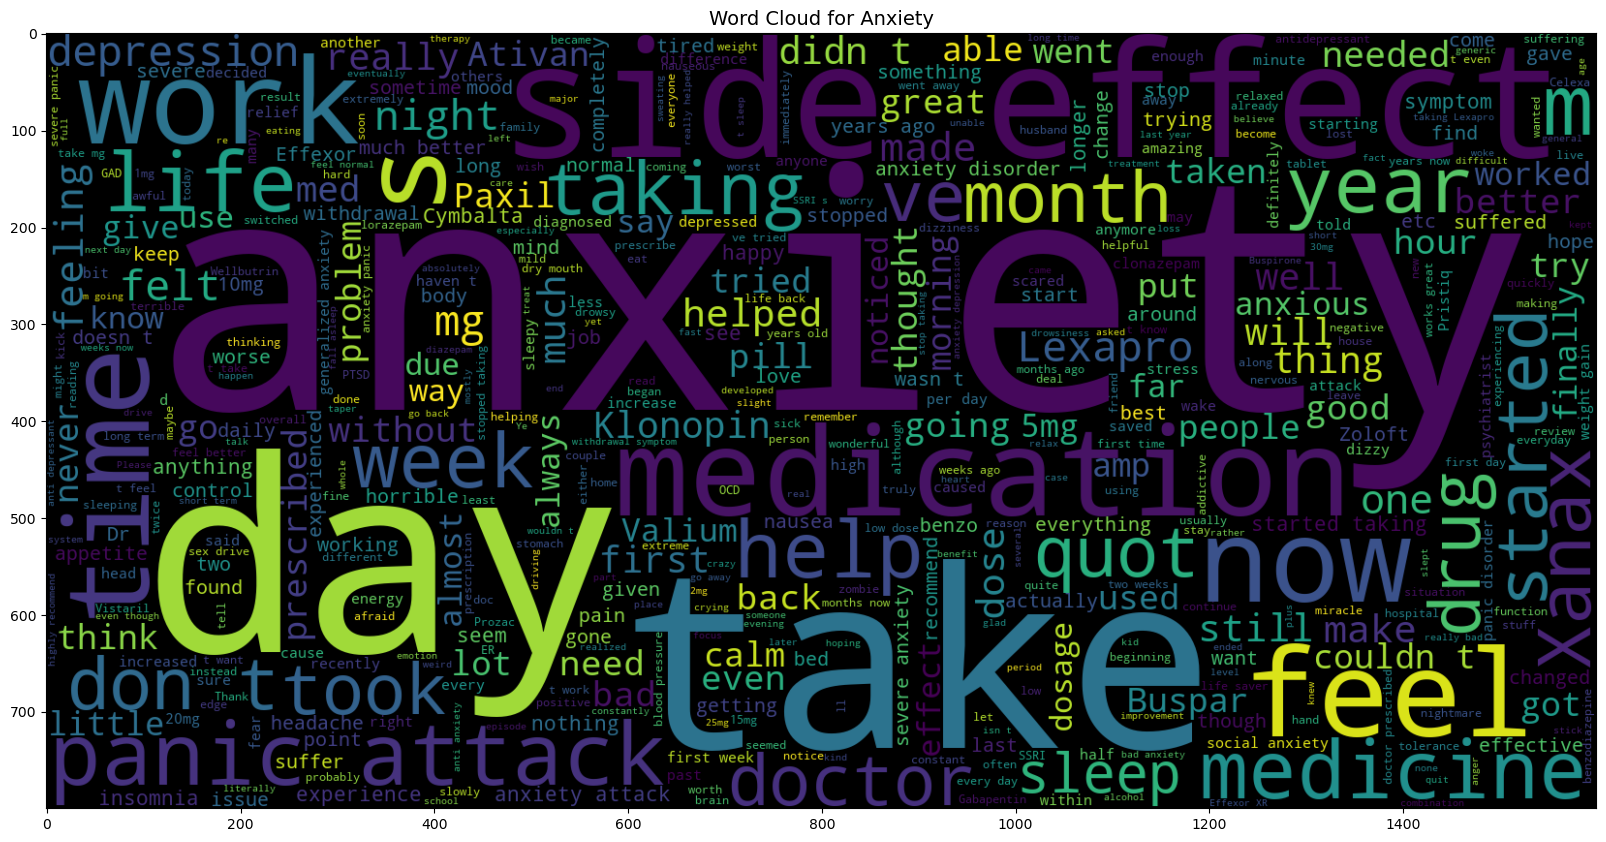

In [17]:

from wordcloud import WordCloud 
plt.figure(figsize=(20,20))
wc = WordCloud(max_words= 500 , width = 1600, height = 800).generate(" ".join(X_anxiety.review))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Word Cloud for Anxiety' ,fontsize=14)

In [18]:
wc

In [19]:
for i, col in enumerate(X.columns):
    X.iloc[:,i] = X.iloc[:,i].str.replace(' " ', ' ' )

In [20]:
X.head()

,condition,review
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
7,Bipolar Disorde,"""Abilify changed my life. There is hope. I was..."
9,Birth Control,"""I had been on the pill for many years. When m..."
11,Depression,"""I have taken anti-depressants for years, with..."


In [21]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop = stopwords.words('english')
from bs4 import BeautifulSoup 
import re


In [22]:
lemmatizer = WordNetLemmatizer()

In [23]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install html.parser

Note: you may need to restart the kernel to use updated packages.


In [25]:
def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review,'html.parser').get_text() # Deleting html elements after web scrapping
    letters_only = re.sub('[^a-zA-Z]' , ' ' , review_text) 
    words = letters_only.lower().split()
    meaningful_words = [ w for w in words if not w in stop ]
    lemm_words = [ lemmatizer.lemmatize(w) for w in meaningful_words ]
    return(' '.join(lemm_words))

    

In [26]:
X['review_clean'] = X['review'].apply(review_to_words)

/var/folders/yt/m3t63_md6313mdtp_6bbphtw0000gn/T/ipykernel_59082/3219453185.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review,'html.parser').get_text() # Deleting html elements after web scrapping
/var/folders/yt/m3t63_md6313mdtp_6bbphtw0000gn/T/ipykernel_59082/608967001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['review_clean'] = X['review'].apply(review_to_words)


In [27]:
X.head()

,condition,review,review_clean
2,Birth Control,"""I used to take another oral contraceptive, wh...",used take another oral contraceptive pill cycl...
3,Birth Control,"""This is my first time using any form of birth...",first time using form birth control glad went ...
7,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",abilify changed life hope zoloft clonidine fir...
9,Birth Control,"""I had been on the pill for many years. When m...",pill many year doctor changed rx chateal effec...
11,Depression,"""I have taken anti-depressants for years, with...",taken anti depressant year improvement mostly ...


In [28]:
X_features = X['review_clean']
y = X['condition']
X_train , X_test , y_train , y_test = train_test_split(X_features ,y , stratify = y , test_size = 0.2 , random_state = 0 )

In [29]:
count_vectorizer = CountVectorizer(stop_words = 'english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [30]:
count_train

<50712x20800 sparse matrix of type '<class 'numpy.int64'>'
	with 1571760 stored elements in Compressed Sparse Row format>

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english' , max_df = 0.80)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt = DecisionTreeClassifier()
dt.fit(count_train,y_train)
pred = dt.predict(count_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy; %0.3f" % score)

accuracy; 0.882


In [34]:
from sklearn.pipeline import Pipeline

In [35]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('dt', dt)
])

In [36]:
param_grid = {
    'dt__criterion': ['gini', 'entropy'],               
    'dt__max_depth': [3, 5, 10, None],
    'dt__min_samples_split': [2, 5, 10]
}

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
random_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_grid,
    n_iter=20,                
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)


In [39]:
print(X.shape)  
print(y.shape)

(63391, 3)
(63391,)


In [40]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('dt', dt)
])

In [41]:
param_grid = {
    'dt__criterion': ['gini', 'entropy'],               
    'dt__max_depth': [3, 5, 10, None],
    'dt__min_samples_split': [2, 5, 10]
}

In [42]:
random_search = RandomizedSearchCV(pipe, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X['review'], y)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('dt', DecisionTreeClassifier())]),
                   param_distributions={'dt__criterion': ['gini', 'entropy'],
                                        'dt__max_depth': [3, 5, 10, None],
                                        'dt__min_samples_split': [2, 5, 10]})

In [43]:
print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

Best Parameters: {'dt__min_samples_split': 2, 'dt__max_depth': None, 'dt__criterion': 'entropy'}
Best CV Score: 0.8635768177051212


In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
param_dist = {
    'tfidf__max_df': [0.7, 0.85, 1.0],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 50],
    'rf__min_samples_split': [2, 5, 10]
}

In [46]:
pipe1 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())  # <- updated step name
])

In [47]:
param_dist = {
    'tfidf__max_df': [0.7, 0.85, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5]
}


In [48]:
random_search = RandomizedSearchCV(pipe1, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='accuracy', verbose=1, random_state=42)

In [49]:
random_search.fit(X['review'], y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('rf', RandomForestClassifier())]),
                   param_distributions={'rf__max_depth': [None, 10, 20],
                                        'rf__min_samples_split': [2, 5],
                                        'rf__n_estimators': [100, 200],
                                        'tfidf__max_df': [0.7, 0.85, 1.0],
                                        'tfidf__ngram_range': [(1, 1), (1, 2)]},
                   random_state=42, scoring='accuracy', verbose=1)

In [50]:
print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

Best Parameters: {'tfidf__ngram_range': (1, 1), 'tfidf__max_df': 0.7, 'rf__n_estimators': 200, 'rf__min_samples_split': 5, 'rf__max_depth': None}
Best CV Score: 0.9116277994247787


In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(count_train , y_train)
pred = rf.predict(count_test)
score = metrics.accuracy_score(y_test , pred)
print("accuracy; %0.3f" % score)

accuracy; 0.924


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english' , max_df = 0.80 , ngram_range=(1,3))
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,max_depth=None, min_samples_split=5,oob_score=True,max_samples=None)
rf.fit(count_train , y_train)
pred = rf.predict(count_test)
score = metrics.accuracy_score(y_test , pred)
print("accuracy; %0.3f" % score)

accuracy; 0.923


In [55]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 1), max_df=0.7)),
    ('rf', RandomForestClassifier(
        n_estimators=200,
        min_samples_split=5,
        max_depth=None,
        random_state=42,
        oob_score = True
    ))
])

In [56]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.7)),
                ('rf',
                 RandomForestClassifier(min_samples_split=5, n_estimators=200,
                                        oob_score=True, random_state=42))])

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = pipe.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9212082971843205
[[1007    1    0   96    9    0    5]
 [   1  922    6   39  162   21   30]
 [   2   22  629   42  124   17    9]
 [   6    3    0 5736    4    0    9]
 [   3   51   25   75 1613   22   25]
 [   1   18    5   14   37  647   12]
 [   1   20    0   27   34   21 1126]]
                 precision    recall  f1-score   support

           Acne       0.99      0.90      0.94      1118
        Anxiety       0.89      0.78      0.83      1181
Bipolar Disorde       0.95      0.74      0.83       845
  Birth Control       0.95      1.00      0.97      5758
     Depression       0.81      0.89      0.85      1814
       Insomnia       0.89      0.88      0.89       734
           Pain       0.93      0.92      0.92      1229

       accuracy                           0.92     12679
      macro avg       0.91      0.87      0.89     12679
   weighted avg       0.92      0.92      0.92     12679



In [59]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 1), max_df=0.7)),
    ('rf', RandomForestClassifier(
        n_estimators=200,
        min_samples_split=5,
        max_depth=None,
        oob_score=True,
        bootstrap=True,
        random_state=42
    ))
])


pipe.fit(X_train, y_train)


oob = pipe.named_steps['rf'].oob_score_
print("OOB Score:", oob)

OOB Score: 0.9202358416153967


In [61]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn import metrics

# Encode string labels to integers
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Train XGBoost
xgb = XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(count_train, y_train_encoded)
pred_xgb = xgb.predict(count_test)

# Decode predictions if needed
pred_labels = le.inverse_transform(pred_xgb)

# Accuracy
score_xgb = metrics.accuracy_score(y_test_encoded, pred_xgb)
print("XGBoost accuracy: %0.3f" % score_xgb)



/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:08:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost accuracy: 0.917


In [62]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


rf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=5, oob_score=True)
xgb = XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='mlogloss')


ensemble = VotingClassifier(estimators=[
    ('rf', rf),
    ('xgb', xgb)
], voting='soft')  # or voting='hard'


ensemble.fit(count_train, y_train_encoded)


pred = ensemble.predict(count_test)


score = metrics.accuracy_score(y_test_encoded, pred)
print("Voting Ensemble Accuracy: %0.3f" % score)


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:10:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Ensemble Accuracy: 0.928
